# TOR detection using Network Traffic Classification based on Single Flow Time Series Analysis 

Problem: binary detection of TOR traffic

Raw data from: ISCX-Tor-2016 [1]

-----------------------------------------------------------------------
[1] Arash Habibi Lashkari et al. Characterization of Tor Traffic using Time based Features. In ICISSP 2017, pages 253–262. SciTePress, 2017.

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [2]:
df = pd.read_csv("../cnsm_final_datasets/tor_binary.csv")

In [3]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,10.0.2.15.,82.161.239.177,11789,0,14196377,0,1.437495e+09,1.437495e+09,57188,...,25704.002240,0.014613,0.370509,0.280602,-0.475738,20.752998,0.051836,-0.284888,1.000000,True
1,1,82.161.239.177.,10.0.2.15,6269,0,495614,0,1.437495e+09,1.437495e+09,110,...,18070.302201,0.014415,0.409004,0.296028,-0.344568,16.152675,0.055605,-0.402499,1.000000,True
2,2,10.0.2.15.,82.161.239.177,11207,0,13526839,0,1.437495e+09,1.437495e+09,57188,...,13422.346822,0.007660,0.390990,0.304761,-0.457126,9.394153,0.059603,-0.667719,1.000000,True
3,3,82.161.239.177.,10.0.2.15,5939,0,478868,0,1.437495e+09,1.437495e+09,110,...,23325.960757,0.023553,0.408234,0.299550,-0.267777,15.232738,0.070569,-0.571564,1.000000,True
4,4,10.0.2.15.,82.161.239.177,5,0,1629,0,1.437495e+09,1.437495e+09,57188,...,115028.640802,0.562139,0.499915,0.278680,NaN,257.861875,991.100508,-0.233831,0.016924,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120735,120735,54.235.136.66.,10.152.152.11,4,0,618,0,1.438015e+09,1.438015e+09,80,...,-2929.817569,0.022957,0.487442,0.281027,-0.032300,1.081321,0.521574,-0.764867,0.163006,False
120736,120736,10.152.152.11.,54.235.136.66,11,0,5784,0,1.438015e+09,1.438015e+09,58937,...,2071.393352,0.684319,0.573555,0.284019,0.220136,1.392789,0.240401,0.864796,0.062696,False
120737,120737,10.152.152.11.,54.235.136.66,3,0,213,0,1.438015e+09,1.438015e+09,37418,...,8897.027953,0.006667,0.505558,0.287438,0.006330,1.035196,0.044304,0.993135,0.999956,False
120738,120738,54.72.254.110.,10.152.152.11,5,0,1291,0,1.438015e+09,1.438015e+09,80,...,125861.972570,0.010243,0.503138,0.287171,NaN,12.020604,5.769764,-0.000199,0.878992,False


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes

bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


for F in features:
    if F in bool_features:
        continue
    if F in distribution_features:
        df.replace([np.inf], 0.5, inplace=True)
        df.replace([-np.inf], 0.5, inplace=True)
        df.loc[df[F].isnull(), F] = 0.5
    elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
        df.replace([np.inf], 0.5, inplace=True)
        df.replace([-np.inf], 0.5, inplace=True)
        df.loc[df[F].isnull(), F] = 0.5
    # elif F in frequency_features: 
    #     df.replace([np.inf], -1, inplace=True)
    #     df.replace([-np.inf], -1, inplace=True)
    #     df.loc[df[F].isnull(), F] = -1
    # else:
    #     df.replace([np.inf], 0, inplace=True)
    #     df.replace([-np.inf], 0, inplace=True)
    #     df.loc[df[F].isnull(), F] = 0


for F in bool_features:
    df.loc[df[F].isnull(), F] = False
    df[F] = df[F].astype('bool')

In [6]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL,LABEL_code
0,0,10.0.2.15.,82.161.239.177,11789,0,14196377,0,1.437495e+09,1.437495e+09,57188,110,1264,1410.0,416.145407,173177,-0.504632,1340.0,1480.0,60,1480,1420,1480,32.922896,267,21.123418,1330.931284,0.156078,0.843922,-0.519049,5.723961,-2.306965,2.849591e-09,2.849953e-09,2.085714,6.788683,2.696840,0.199394,0.539646,False,0.801695,0.534335,0.689567,0.633387,0.977908,186.786784,169.005291,103.695905,236.928843,294.901456,0.025017,0.000378,0.000000,35.543898,0.000704,False,1.467255,False,0.0,0.689567,4657947,1.0,False,0,0.0,7.205691e-09,0.002057,0.299899,0.015011,0.000099,0.000129,0.00000,0.495679,6.201183,2.788608e+05,25704.002240,0.014613,0.370509,0.280602,-0.475738,20.752998,0.051836,-0.284888,True,True,1
1,1,82.161.239.177.,10.0.2.15,6269,0,495614,0,1.437495e+09,1.437495e+09,110,57188,139,60.0,192.657728,37117,0.161786,60.0,60.0,60,1117,1057,60,138.602682,135,97.122302,237.589376,0.855160,0.144840,0.410054,1.853027,2.057789,8.097465e-09,8.099403e-09,0.000000,5.400178,0.603908,0.047876,0.554804,False,0.445870,0.526740,0.691589,0.629204,0.832657,185.553901,168.820044,102.639528,236.805259,294.902490,0.047049,0.002509,0.000000,35.543523,0.001324,False,0.536694,True,0.0,0.691589,266328,1.0,False,0,0.0,1.321792e-08,0.001628,0.417112,0.014613,0.000101,0.000116,0.00000,0.504094,6.346548,1.506518e+05,18070.302201,0.014415,0.409004,0.296028,-0.344568,16.152675,0.055605,-0.402499,True,True,1
2,2,10.0.2.15.,82.161.239.177,11207,0,13526839,0,1.437495e+09,1.437495e+09,57188,110,1266,1410.0,415.198748,172391,-0.506068,1340.0,1480.0,60,1480,1420,1480,32.796110,266,21.011058,1333.289968,0.155617,0.844383,-0.515416,5.751462,-2.250870,1.395868e-08,1.396054e-08,2.057143,6.813601,2.658932,0.197659,0.539678,False,0.806781,0.090224,0.603290,0.547053,0.980065,163.881194,205.187815,81.848387,239.537993,299.571058,0.026733,0.000080,0.000000,45.360642,0.000589,False,1.440835,False,0.0,0.603290,7228211,1.0,False,0,0.0,1.480866e-08,0.001201,0.675577,0.007859,0.000128,0.000152,0.00000,0.639139,7.779198,6.719684e+04,13422.346822,0.007660,0.390990,0.304761,-0.457126,9.394153,0.059603,-0.667719,True,True,1
3,3,82.161.239.177.,10.0.2.15,5939,0,478868,0,1.437495e+09,1.437495e+09,110,57188,140,60.0,193.571692,37470,0.160600,60.0,60.0,60,1117,1057,60,138.265494,136,97.142857,239.251682,0.851827,0.148173,0.413284,1.859776,2.010988,8.700831e-08,8.703029e-08,0.000000,5.082190,0.608692,0.048556,0.557919,False,0.449203,0.105961,0.600131,0.549039,0.831513,164.497330,205.213809,81.998883,239.659889,299.609362,0.050456,0.001919,0.000020,45.360370,0.001112,False,0.537555,False,0.0,0.600131,415324,1.0,False,0,0.0,1.665365e-08,0.002066,0.595713,0.024149,0.000136,0.000184,0.00001,0.677999,8.167381,1.804139e+05,23325.960757,0.023553,0.408234,0.299550,-0.267777,15.232738,0.070569,-0.571564,True,True,1
4,4,10.0.2.15.,82.161.239.177,5,0,1629,0,1.437495e+

In [7]:
print(f"tor: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")

tor: 1260	clear: 119480


In [8]:
df = df[["LABEL_code"] + features].copy()

In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [10]:
print(f"tor: {len(df[df['LABEL_code'] == 1])}\tclear: {len(df[df['LABEL_code'] == 0])}")

tor: 999	clear: 48820


In [11]:
df_validation = df.sample(n = 5000)
df_features =  df[~df.isin(df_validation)].dropna()

In [12]:
df_features

,LABEL_code,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,DIRECTIONS,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF
0,1.0,11789.0,0.0,14196377.0,0.0,1264.0,1410.0,416.145407,173177.0,-0.504632,1340.0,1480.0,60.0,1480.0,1420.0,1480.0,32.922896,267.0,21.123418,1330.931284,0.156078,0.843922,-0.519049,5.723961,-2.306965,2.849591e-09,2.849953e-09,2.085714,6.788683,2.696840,0.199394,0.539646,0.0,0.801695,0.534335,0.689567,0.633387,0.977908,186.786784,169.005291,103.695905,236.928843,294.901456,0.025017,0.000378,0.000000,35.543898,0.000704,0.0,1.467255,1.0,0.0,0.0,0.689567,4657947.0,0.0,0.0,0.0,7.205691e-09,0.002057,0.299899,0.015011,0.000099,0.000129,0.00000,0.495679,6.201183,278860.758958,25704.002240,0.014613,0.370509,0.280602,-0.475738,20.752998,0.051836,-0.284888,1.0
1,1.0,6269.0,0.0,495614.0,0.0,139.0,60.0,192.657728,37117.0,0.161786,60.0,60.0,60.0,1117.0,1057.0,60.0,138.602682,135.0,97.122302,237.589376,0.855160,0.144840,0.410054,1.853027,2.057789,8.097465e-09,8.099403e-09,0.000000,5.400178,0.603908,0.047876,0.554804,0.0,0.445870,0.526740,0.691589,0.629204,0.832657,185.553901,168.820044,102.639528,236.805259,294.902490,0.047049,0.002509,0.000000,35.543523,0.001324,0.0,0.536694,1.0,1.0,0.0,0.691589,266328.0,0.0,0.0,0.0,1.321792e-08,0.001628,0.417112,0.014613,0.000101,0.000116,0.00000,0.504094,6.346548,150651.791782,18070.302201,0.014415,0.409004,0.296028,-0.344568,16.152675,0.055605,-0.402499,1.0
2,1.0,11207.0,0.0,13526839.0,0.0,1266.0,1410.0,415.198748,172391.0,-0.506068,1340.0,1480.0,60.0,1480.0,1420.0,1480.0,32.796110,266.0,21.011058,1333.289968,0.155617,0.844383,-0.515416,5.751462,-2.250870,1.395868e-08,1.396054e-08,2.057143,6.813601,2.658932,0.197659,0.539678,0.0,0.806781,0.090224,0.603290,0.547053,0.980065,163.881194,205.187815,81.848387,239.537993,299.571058,0.026733,0.000080,0.000000,45.360642,0.000589,0.0,1.440835,1.0,0.0,0.0,0.603290,7228211.0,0.0,0.0,0.0,1.480866e-08,0.001201,0.675577,0.007859,0.000128,0.000152,0.00000,0.639139,7.779198,67196.844782,13422.346822,0.007660,0.390990,0.304761,-0.457126,9.394153,0.059603,-0.667719,1.0
3,1.0,5939.0,0.0,478868.0,0.0,140.0,60.0,193.571692,37470.0,0.160600,60.0,60.0,60.0,1117.0,1057.0,60.0,138.265494,136.0,97.142857,239.251682,0.851827,0.148173,0.413284,1.859776,2.010988,8.700831e-08,8.703029e-08,0.000000,5.082190,0.608692,0.048556,0.557919,0.0,0.449203,0.105961,0.600131,0.549039,0.831513,164.497330,205.213809,81.998883,239.659889,299.609362,0.050456,0.001919,0.000020,45.360370,0.001112,0.0,0.537555,1.0,0.0,0.0,0.600131,415324.0,0.0,0.0,0.0,1.665365e-08,0.002066,0.595713,0.024149,0.000136,0.000184,0.00001,0.677999,8.167381,180413.882057,23325.960757,0.023553,0.408234,0.299550,-0.267777,15.232738,0.070569,-0.571564,1.0
16,1.0,79.0,0.0,29148.0,0.0,428.0,603.0,326.845529,106829.0,-0.134007,60.0,603.0,60.0,1117.0,1057.0,603.0,76.365778,289.0,67.523364,538.038067,0.392405,0.607595,-0.535421,2.083553,0.198466,2.755236e-08,2.808853e-08,-0.355433,2.174086,1.296601,0.205686,0.508400,0.0,0.553071,0.000000,0.000000,0.492733,0.654762,11.6165

In [13]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [14]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 15, 100, 10),
        'gamma': hp.uniform ('gamma', 1,10),
        'reg_alpha' : hp.quniform('reg_alpha', 0,18,5),
        'reg_lambda' : hp.uniform('reg_lambda', 0,2),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 2),
        'n_estimators': hp.quniform('n_estimators', 100, 600, 100),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [15]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [01:36<00:00,  1.03trial/s, best loss: -0.920892494929006]
The best hyperparameters are :  

{'colsample_bytree': 0.7676493464645151, 'gamma': 3.7385641904968914, 'max_depth': 20.0, 'min_child_weight': 2.0, 'n_estimators': 200.0, 'reg_alpha': 0.0, 'reg_lambda': 0.928673625006545}


In [18]:
def XGBoost_classification_tunned(best_hyperparams):
      X=df_features[features]  # Features
      y=df_features['LABEL_code']  # Labels
      # #Split on train and test
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
            gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
      precision = precision_score(y_test, y_pred)  * 100
      recall = recall_score(y_test, y_pred)  * 100
      F1 = f1_score(y_test, y_pred)  * 100
      print("{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

99.73 & 100.00 & 86.47 & 92.74 \\


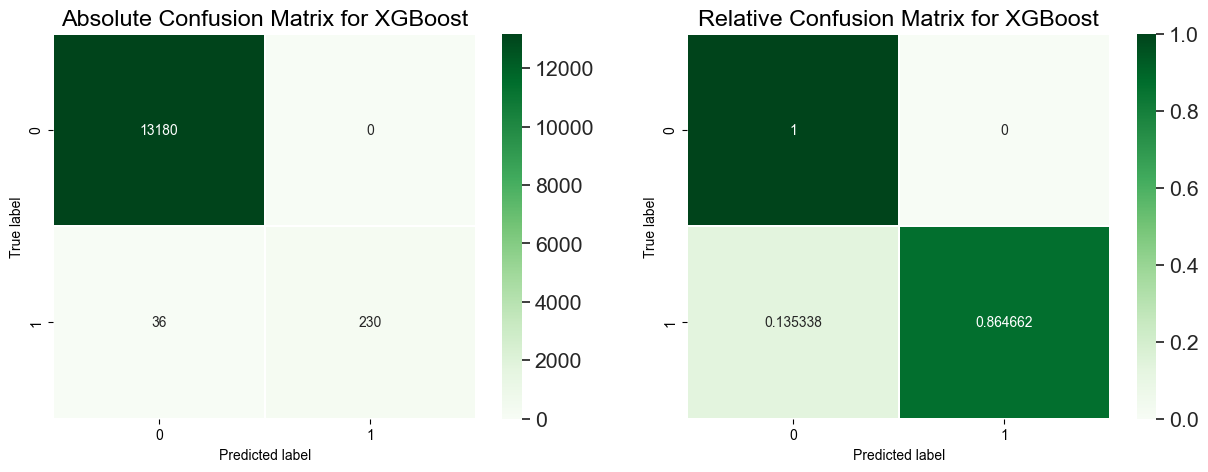

In [19]:
model = XGBoost_classification_tunned(best_hyperparams)

In [20]:

def while_XGBoost_classification_tunned(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best_results = (0,"",None,None, None, None, None, None, None)
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
        for F, N in zip(
                [ features], # statistics_features, time_features, distribution_features, frequency_features, behavior_features, 
                [ "All"], # "Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based", 
        ):
                X_train = X_train_a[F]
                X_test = X_test_a[F] 
                model = XGBClassifier(
                        n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
                        # gamma = best_hyperparams['gamma'],
                        # reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                        # colsample_bytree=int(best_hyperparams['colsample_bytree']),
                        # subsample=int(best_hyperparams['subsample']),
                        # eta=best_hyperparams['eta'],
                )
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
                precision = precision_score(y_test, y_pred)  * 100
                recall = recall_score(y_test, y_pred)  * 100
                F1 = f1_score(y_test, y_pred)  * 100
                if N == "All":
                    tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\hline"
                    tmp_str += "\n"
                    tmp_f1 = F1
                elif N in ["Statistical-based", "Distribution-based", "Behavior-based"]:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
                else:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & \\rowcolor{LigthGray} " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
        if best_results[0] < tmp_f1:
            matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
            best_results = (tmp_f1, tmp_str, matrix, percentage_matrix, model, X_train, y_train, X_test, y_test)
    print("")
    print("")
    print("")
    print(best_results[0])
    print(best_results[1])
    plot_confusion_matrix(best_results[2], best_results[3], model="XGBoost")
    return best_results[4], best_results[5], best_results[6], best_results[7], best_results[8]

99


99.43289224952741
\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.98 & 100.00 & 98.87 & 99.43 \\
\hline



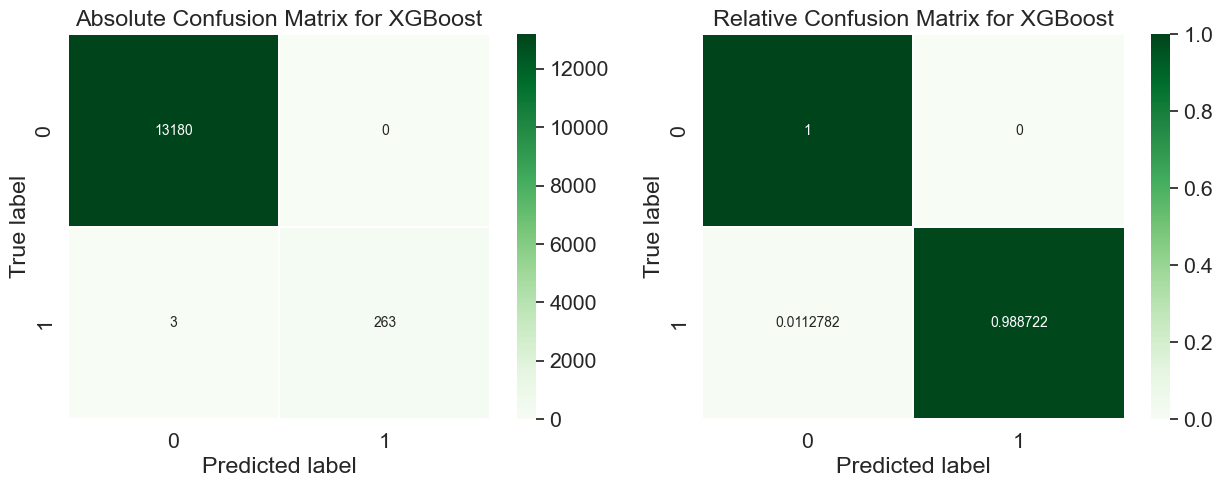

In [21]:
best_model, X_train, y_train, X_test, y_test = while_XGBoost_classification_tunned(best_hyperparams, cycles=100)

# Evaluation of model

\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.84 & 100.00 & 92.92 & 96.33 \\
\hline



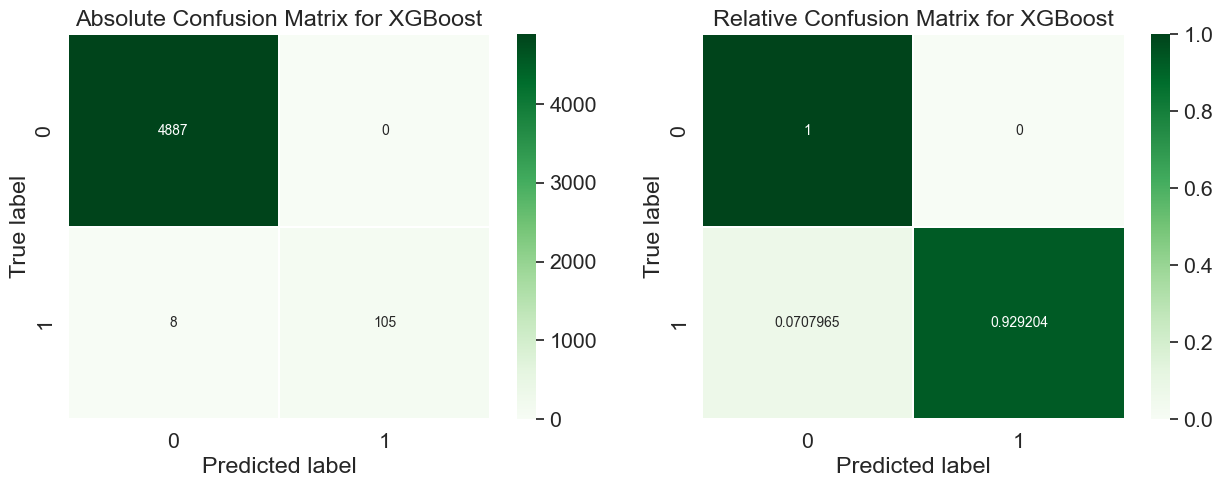

In [22]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels


y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

In [23]:
import csv

problem = "TOR-binary"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    writer.writerow([problem, "-", accuracy, precision, recall, F1, 0, 0, 0])

# Feature importance

## Feature selection

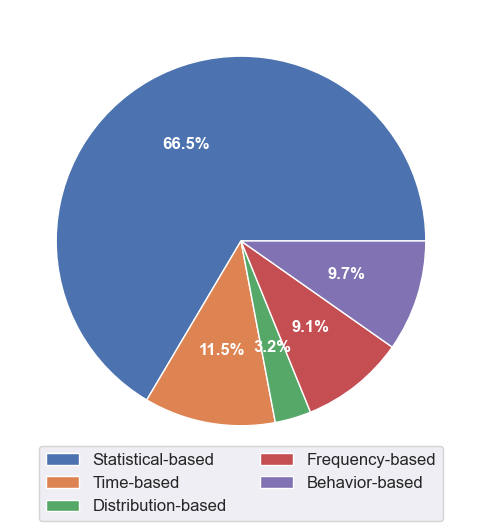

In [24]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [25]:
data

[0.526114, 0.09095243, 0.025012858, 0.07219983, 0.07706087]

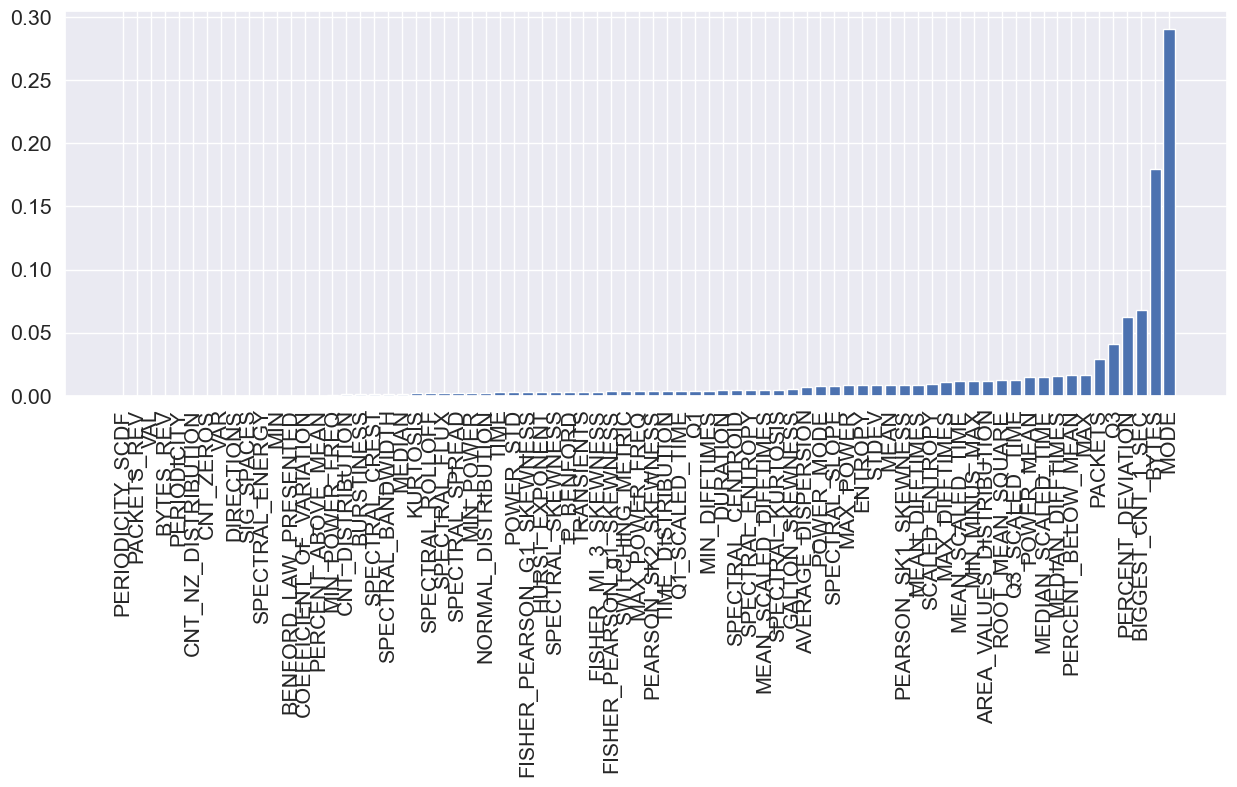

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [27]:
feat_importances.to_dict()

{'PERIODICITY_SCDF': 0.0,
 'PACKETS_REV': 0.0,
 'VAL': 0.0,
 'BYTES_REV': 0.0,
 'PERIODICITY': 0.0,
 'CNT_NZ_DISTRIBUTION': 0.0,
 'CNT_ZEROS': 0.0,
 'VAR': 0.0,
 'DIRECTIONS': 0.0,
 'SIG_SPACES': 0.0,
 'SPECTRAL_ENERGY': 0.0,
 'MIN': 0.0,
 'BENFORD_LAW_PRESENTED': 0.0,
 'COEFFICIENT_OF_VARIATION': 0.0,
 'PERCENT_ABOVE_MEAN': 9.129656245931983e-05,
 'MIN_POWER_FREQ': 0.0008059419924393296,
 'CNT_DISTRIBUTION': 0.0009660261566750705,
 'BURSTINESS': 0.001010721898637712,
 'SPECTRAL_CREST': 0.0010603767586871982,
 'SPECTRAL_BANDWIDTH': 0.001376707456074655,
 'MEDIAN': 0.0014761454658582807,
 'KURTOSIS': 0.0018354974454268813,
 'SPECTRAL_ROLLOFF': 0.001881833071820438,
 'SPECTRAL_FLUX': 0.0020188605412840843,
 'SPECTRAL_SPREAD': 0.002063323277980089,
 'MIN_POWER': 0.002329127164557576,
 'NORMAL_DISTRIBUTION': 0.002425523940473795,
 'TIME': 0.0025226380676031113,
 'POWER_STD': 0.0028218787629157305,
 'FISHER_PEARSON_G1_SKEWNESS': 0.0028854201082140207,
 'HURST_EXPONENT': 0.003021172247827053

## Feature corelation

In [36]:
def perform_val(selected_features, best_hyperparams=None, cycles=10):
    if best_hyperparams is None:
        best_hyperparams = tunne_together_XGBoost_classification(df_features, selected_features, verbose=False)
    
    X=df_features[selected_features]  # Features
    y=df_features['LABEL_code']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test   
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
        )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
        precision = precision_score(y_test, y_pred)  * 100
        recall = recall_score(y_test, y_pred)  * 100
        F1 = f1_score(y_test, y_pred)  * 100
        if F1 > best:   
            best = F1
            best_model = model
            
    
    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL_code']  # Labels

    y_pred = best_model.predict(X_validation)
    accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
    precision = precision_score(y_validation, y_pred)  * 100
    recall = recall_score(y_validation, y_pred)  * 100
    F1 = f1_score(y_validation, y_pred)  * 100
    
    return accuracy,precision,recall,F1

In [37]:
import FEATURE_REDUCTED as FR
REPORTS = []

report = perform_val(FR.botnet_best_features)
REPORTS.append(report)
report = perform_val(FR.doh_best_features)
REPORTS.append(report)
report = perform_val(FR.dos_best_features)
REPORTS.append(report)
report = perform_val(FR.dns_malware_features)
REPORTS.append(report)
report = perform_val(FR.tor_features)
REPORTS.append(report)
report = perform_val(FR.vpn_features)
REPORTS.append(report)
report = perform_val(FR.all_best_features)
REPORTS.append(report)
report = perform_val(FR.combo_features)
REPORTS.append(report)
report = perform_val(FR.combo_2_features)
REPORTS.append(report)
report = perform_val(FR.crypto_features)
REPORTS.append(report)

100%|██████████| 100/100 [01:48<00:00,  1.09s/trial, best loss: -0.8166666666666665]
The best hyperparameters are :  

{'colsample_bytree': 0.5000021000313974, 'gamma': 6.8069190442833, 'max_depth': 30.0, 'min_child_weight': 8.0, 'n_estimators': 300.0, 'reg_alpha': 0.0, 'reg_lambda': 0.7718227693962179}
100%|██████████| 100/100 [01:23<00:00,  1.19trial/s, best loss: -0.8952772073921972]
The best hyperparameters are :  

{'colsample_bytree': 0.5746614403398153, 'gamma': 1.8059193443361408, 'max_depth': 20.0, 'min_child_weight': 6.0, 'n_estimators': 600.0, 'reg_alpha': 0.0, 'reg_lambda': 1.6700456345729324}
100%|██████████| 100/100 [01:28<00:00,  1.13trial/s, best loss: -0.931726907630522]
The best hyperparameters are :  

{'colsample_bytree': 0.18656410249177174, 'gamma': 3.6647834927387453, 'max_depth': 40.0, 'min_child_weight': 2.0, 'n_estimators': 300.0, 'reg_alpha': 0.0, 'reg_lambda': 1.1338430846363072}
100%|██████████| 100/100 [03:02<00:00,  1.83s/trial, best loss: -0.906122448979

In [38]:
import csv

problem = "TOR-binary"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FR.FEATURE_SETS):
        writer.writerow([problem, f_set, report[0], report[1], report[2], report[3], 0, 0, 0])